In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


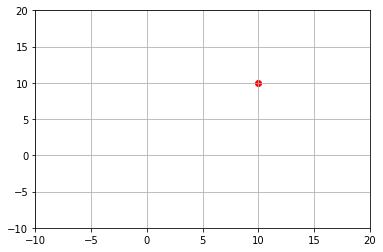

In [2]:

plt.figure(0)
plt.grid("on")
plt.xlim(-10.0,20.0)
plt.ylim(-10.0,20.0)
plt.scatter([10.0],[10.0],color = 'red')
plt.show()


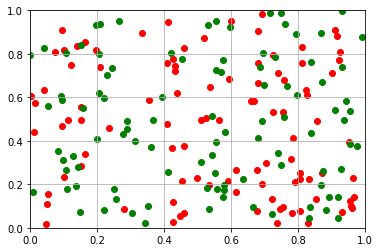

In [3]:
arr = np.random.random((100,2))
arr1 = np.random.random((100,2))

plt.figure(0)
plt.grid("on")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(arr[: ,0],arr[ : , 1],color = "red")
plt.scatter(arr1[ : ,0 ],arr1[ : , 1] , color = 'green')
plt.show()

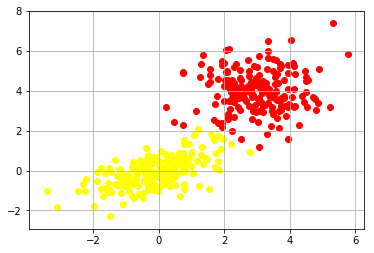

In [4]:
mean_01 = np.array([3.0,4.0])

cov_01 = np.array([[1.0,0.0],[0.0,1.0]])

mean_02 = np.array([0.0,0.0])

cov_02 = np.array([[1.0,0.5],[0.5,0.6]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,200)

dist_02 = np.random.multivariate_normal(mean_02,cov_02,200)
plt.figure(0)
plt.grid("on")

for x in dist_01:
    plt.scatter(x[0],x[1],color="red")
for x in dist_02:
    plt.scatter(x[0],x[1],color="yellow")

plt.show()


In [5]:
# Training data preparation

# 400 samples - 200 apples , 200 lamens

labels = np.zeros((400,1))
labels[ :200] = 0.0
labels[200:] = 1.0

x_data = np.zeros((400,2))
x_data[ :200, :] = dist_01

x_data[200: , :] = dist_02

# print(x_data)

# print(labels)


In [6]:
# Euclidean Distance

def dis(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

# x1 = np.array([1.0,2.0])
# x2 = np.array([4.0,6.0])
# print(dis(x1,x2))

In [7]:
def knn(x_train,query_point,y_train,k=5):
    vals=[]
    
    for ix in range(x_train.shape[0]):
        v=[dis(query_point,x_train[ix,:]),y_train[ix]]
        vals.append(v)
        
    updated_vals = sorted(vals)
    
    pred_arr = np.array(updated_vals[ :k])
    
    pred_arr = np.unique(pred_arr[ : , 1],return_counts=True)
    
    index = pred_arr[1].argmax()
    
#     print(pred_arr)
    
    return pred_arr[0][index]
    
    
    
q = np.array([0.8,2.0])

predicted_level = knn(x_data,q,labels)
# print(predicted_level)

In [8]:
def predict(x_train,y_train):
    all_pred=[]
    for x in x_train:
        pred = knn(x_train,x,y_train)
        
        all_pred.append(pred)
        
    all_pred = np.array(all_pred,dtype='int32')
    
    return all_pred


In [9]:
pred = predict(x_data,labels)

count = 0
for x in range(labels.shape[0]):
    if pred[x]==labels[x]:
        count += 1
    accuracy = count/(int)(labels.shape[0])
print(accuracy)

# print(count)
# print(labels.shape[0])


0.9975
